In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
raw_data = pd.read_csv("used_car_data_set.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.shape

(4345, 9)

In [4]:
raw_data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data = raw_data.drop(columns = ['Model'],axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_no_mv = data.dropna(axis = 0)

In [8]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### For optimal result we would be looking for a normal distribution

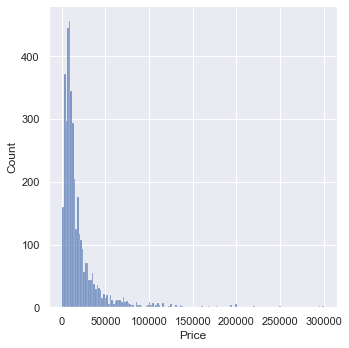

In [9]:
sns.displot(data_no_mv['Price']);

### one way to deal with outliers is remove top 1% of observation

In [10]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


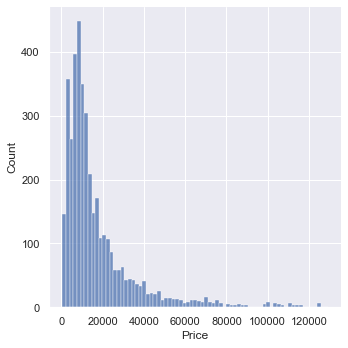

In [11]:
sns.displot(data_1['Price']);

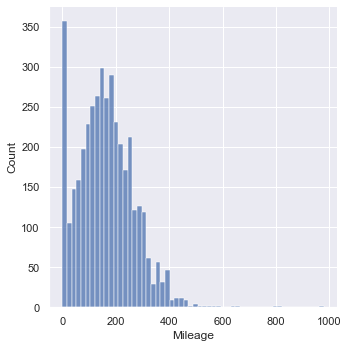

In [12]:
sns.displot(data_no_mv['Mileage']);

In [13]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]

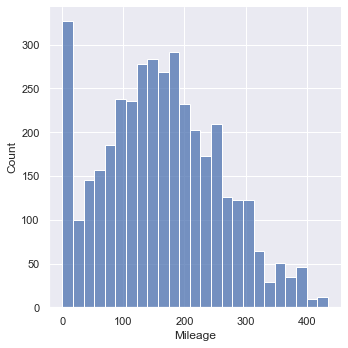

In [14]:
sns.displot(data_2['Mileage']);

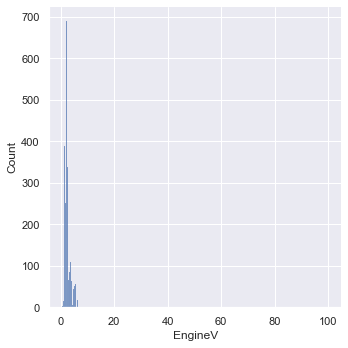

In [15]:
sns.displot(data_no_mv['EngineV']);

In [16]:
Eng_v = pd.DataFrame(raw_data['EngineV'])
Eng_v = Eng_v.dropna(axis = 0)
Eng_v.sort_values(by = 'EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


### 99 is not usal value for Engine volume 

In [18]:
data_3 = data_2[data_2['EngineV'] < 6.5]

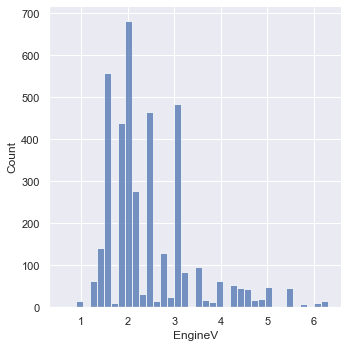

In [19]:
sns.displot(data_3['EngineV']);

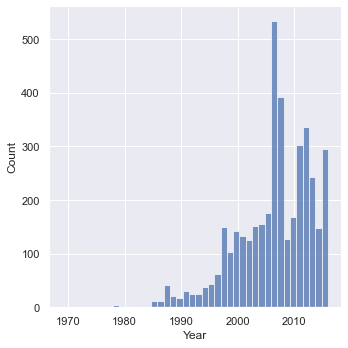

In [20]:
sns.displot(data_no_mv['Year']);

In [21]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

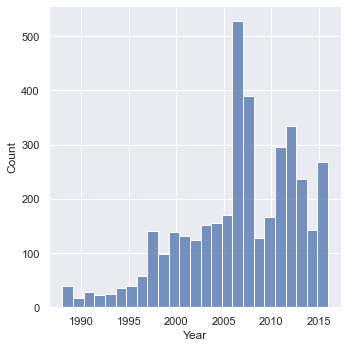

In [22]:
sns.displot(data_4['Year']);

In [23]:
data_cleaned = data_4.reset_index(drop = True)

In [24]:
data_cleaned.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [25]:
data_cleaned.shape

(3867, 8)

In [26]:
data_cleaned.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

### Checking the OLS assumption

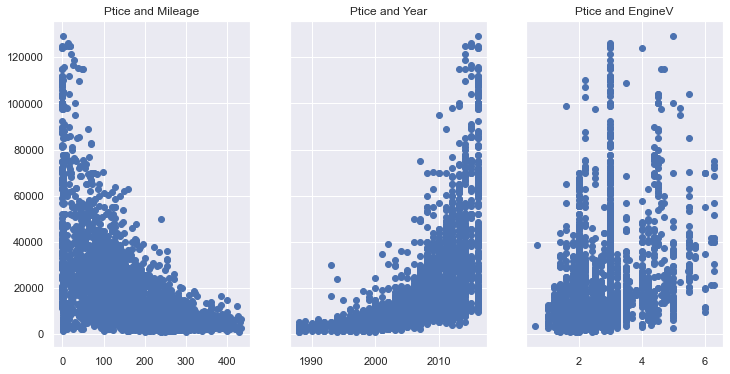

In [27]:
fig ,ax = plt.subplots(1,3,sharey = True, figsize = (12,6))
ax[0].scatter(x='Mileage',y ='Price',data = data_cleaned)
ax[1].scatter(x='Year',y ='Price',data = data_cleaned)
ax[2].scatter(x='EngineV',y ='Price',data = data_cleaned)
ax[0].set_title('Ptice and Mileage')
ax[1].set_title('Ptice and Year')
ax[2].set_title('Ptice and EngineV')
plt.show()

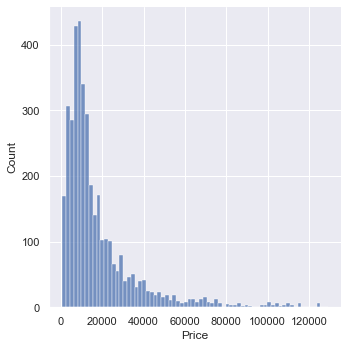

In [28]:
sns.displot(data_cleaned["Price"]); # Price is not normaly distribution

In [29]:
data_cleaned["Log_price"] = data_cleaned["Price"].apply(lambda x: np.log(x)) # use transformation 

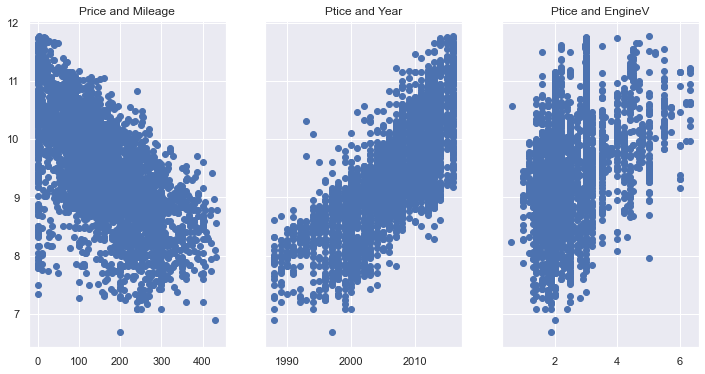

In [30]:
fig ,ax = plt.subplots(1,3,sharey = True, figsize = (12,6))
ax[0].scatter(x='Mileage',y ='Log_price',data = data_cleaned)
ax[1].scatter(x='Year',y ='Log_price',data = data_cleaned)
ax[2].scatter(x='EngineV',y ='Log_price',data = data_cleaned)
ax[0].set_title('Price and Mileage')
ax[1].set_title('Ptice and Year')
ax[2].set_title('Ptice and EngineV')
plt.show()

In [31]:
data_cleaned.drop(columns = ['Price'],axis = 1,inplace = True)
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


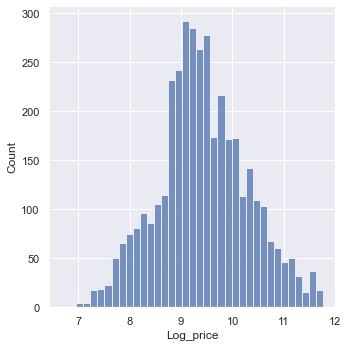

In [32]:
sns.displot(data_cleaned['Log_price']);

### Control Multicollinearity

In [33]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log_price'], dtype=object)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','EngineV','Year']]

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

vif['features'] =variables.columns

In [35]:
vif

,VIF,features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [36]:
## VIF > 10 is unacceptable : remove Year from data frame

data_cleaned.drop(columns = ['Year'],inplace = True)

In [37]:
data_with_dummies = pd.get_dummies(data_cleaned)
data_with_dummies.head()

,Mileage,EngineV,Log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [38]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_price', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype=object)

In [39]:
cols = ['Log_price','Mileage', 'EngineV', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes']

In [40]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Log_price,Mileage,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,8.342840,277,2.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,8.974618,427,2.9,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,9.495519,358,5.0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,10.043249,240,4.2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,9.814656,120,2.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [41]:
targets = data_preprocessed['Log_price']
inputs = data_preprocessed.drop(['Log_price'],axis = 1)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)


StandardScaler()

In [43]:
inputs_scaled = scaler.transform(inputs)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(inputs_scaled,targets,test_size = 0.20,random_state = 42)

In [45]:
reg_model = LinearRegression()

reg_model.fit(X_train,y_train)

LinearRegression()

In [46]:
y_hat  = reg_model.predict(X_train)

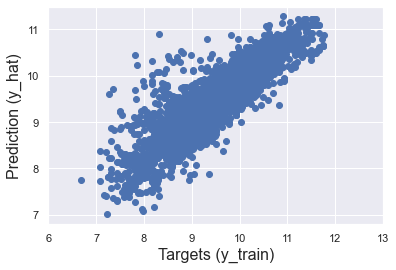

In [47]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size = 16)
plt.ylabel('Prediction (y_hat)',size = 16)
plt.xlim(6,13)
plt.xlim(6,13)
plt.show();

In [48]:
reg_model.score(X_train,y_train)

0.7546483711386351

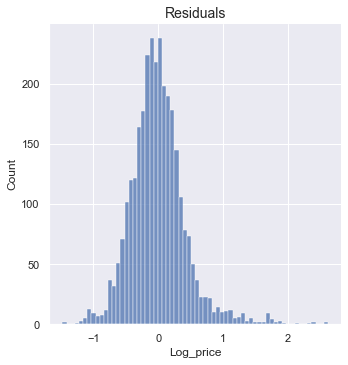

In [49]:
sns.displot(y_hat - y_train)

plt.title("Residuals", size = 14);

In [50]:
reg_model.intercept_

9.421555194571262

In [51]:
reg_model.coef_

array([-4.68165701e-01,  2.15287835e-01, -3.68060188e+10, -4.40736735e+10,
       -4.74905010e+10, -3.21474641e+10, -3.77414625e+10, -4.01308777e+10,
       -4.95727446e+10,  6.54956795e+10,  4.00749341e+10,  4.76724158e+10,
        7.86392132e+10,  4.77874154e+10,  5.90734423e+10,  1.09709087e+11,
        7.78386399e+10,  3.47298540e+10,  1.05561443e+11, -4.79017057e+09,
       -4.79017057e+09])

In [52]:
reg_summary = pd.DataFrame(inputs.columns.values,columns = ['Features'])
reg_summary['Weights'] = reg_model.coef_
reg_summary

,Features,Weights
0,Mileage,-4.681657e-01
1,EngineV,2.152878e-01
2,Brand_Audi,-3.680602e+10
3,Brand_BMW,-4.407367e+10
4,Brand_Mercedes-Benz,-4.749050e+10
5,Brand_Mitsubishi,-3.214746e+10
6,Brand_Renault,-3.774146e+10
7,Brand_Toyota,-4.013088e+10
8,Brand_Volkswagen,-4.957274e+10
9,Body_crossover,6.549568e+10


In [53]:
y_hat_test = reg_model.predict(X_test)

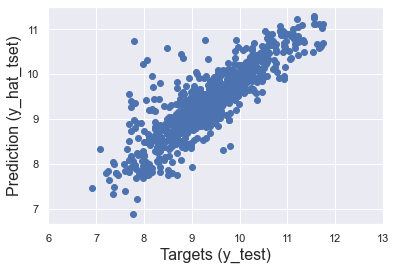

In [54]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)',size = 16)
plt.ylabel('Prediction (y_hat_tset)',size = 16)
plt.xlim(6,13)
plt.xlim(6,13)
plt.show();

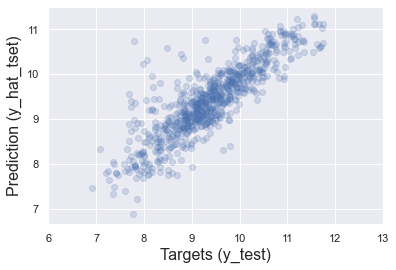

In [55]:
plt.scatter(y_test,y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_test)',size = 16)
plt.ylabel('Prediction (y_hat_tset)',size = 16)
plt.xlim(6,13)
plt.xlim(6,13)
plt.show();

In [56]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_pf.head()

,Prediction
0,40438.792469
1,7960.926545
2,5760.644092
3,9770.614666
4,7030.855089


In [57]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    9.966462
1    9.093807
2    8.086410
3    9.392662
4    8.594154
Name: Log_price, dtype: float64

In [58]:
df_pf['Targets'] = np.exp(y_test)
df_pf.head()

,Prediction,Targets
0,40438.792469,21300.0
1,7960.926545,8900.0
2,5760.644092,3250.0
3,9770.614666,12000.0
4,7030.855089,5400.0


In [59]:
df_pf["Residuals"] = df_pf["Targets"] - df_pf["Prediction"]
df_pf["Difference%"] = np.absolute(df_pf["Residuals"]/df_pf["Targets"]*100)

In [60]:
df_pf.describe()

,Prediction,Targets,Residuals,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16121.507850,17799.988992,1678.481142,42.108962
std,13332.950204,19723.434542,11190.550514,96.232617
min,967.545266,999.000000,-42883.771061,0.005622
25%,7471.355924,6700.000000,-2253.278239,11.075712
50%,11922.294508,11050.000000,-46.317623,24.106954
75%,20257.686553,20475.000000,2998.148714,42.352366
max,79064.243061,125000.000000,81027.011634,1786.823794


In [61]:
pd.set_option('display.float_format',lambda x:'%2f' % x)
df_pf.sort_values(by = ['Difference%'],inplace = True)
df_pf

,Prediction,Targets,Residuals,Difference%
74,28901.624663,28900.000000,-1.624663,0.005622
387,13609.938203,13600.000000,-9.938203,0.073075
425,2997.488447,3000.000000,2.511553,0.083718
314,35545.808635,35500.000000,-45.808635,0.129038
336,11319.765966,11300.000000,-19.765966,0.174920
...,...,...,...,...
713,13948.003907,2200.000000,-11748.003907,534.000178
280,39494.043179,4800.000000,-34694.043179,722.792566
219,27646.378256,2900.000000,-24746.378256,853.323388
750,30092.397531,3150.000000,-26942.397531,855.314207
